In [1]:
import cnfgen as cnf
import networkx as nx
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob

In [2]:
total_iteration_df = pd.read_csv('./output/iterations_truntime.csv')
all_iterations_df = pd.read_csv('./output/all_iterations.csv')
all_iterations_df['solution'] = all_iterations_df['solution'] + all_iterations_df['Unnamed: 4'] + all_iterations_df['Unnamed: 5'] + all_iterations_df['Unnamed: 6'] + all_iterations_df['Unnamed: 7']
all_iterations_df.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)
# all_iterations_df = all_iterations_df.fillna(0)
# all_iterations_df['dimacs'] = all_iterations_df['dimacs'].map(lambda x: x.lstrip('[0123456789_k_3_').rstrip('.dimacs]'))
# all_iterations_df.to_csv('new.csv')
all_iterations_df['solution'] = all_iterations_df['solution'].str.replace(r'(^.*False.*$)', "1")
all_iterations_df['solution'] = all_iterations_df['solution'].str.replace(r'(^.*True.*$)', "1")
all_iterations_df = all_iterations_df.fillna(0)
all_iterations_df['solution'] = all_iterations_df['solution'].astype(int)
all_iterations_df['dimacs'] = all_iterations_df['dimacs'].map(lambda x: x.lstrip('[0123456789_k_3_').rstrip('.dimacs]'))
all_iterations_df['runtime'] = 100* all_iterations_df['runtime']

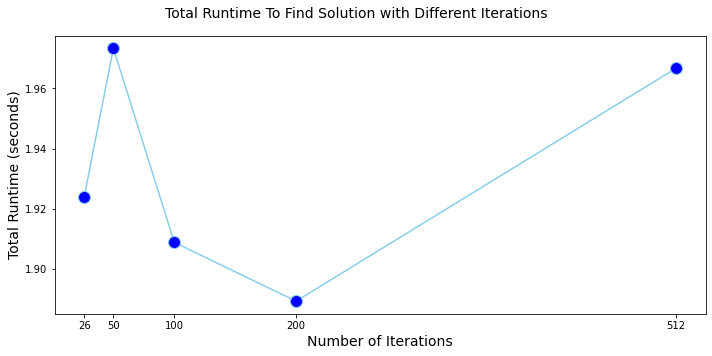

In [3]:
fig1 = plt.figure(figsize=(10, 5), constrained_layout=False)
ax1 = fig1.add_subplot(111)
ax1.plot('iterations', 'runtime', data=total_iteration_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue')
ax1.set_xticks(np.flip(np.array(total_iteration_df['iterations'])))
ax1.set_xlabel("Number of Iterations", size = 14)
ax1.set_ylabel("Total Runtime (seconds)", size = 14)
fig1.suptitle("Total Runtime To Find Solution with Different Iterations", size = 14)
fig1.tight_layout()
fig1.subplots_adjust(top=0.90)
plt.show()

In [4]:
dimacs_wise_group_26 = all_iterations_df[all_iterations_df['iterations'] == 26].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_50 = all_iterations_df[all_iterations_df['iterations'] == 50].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_100 = all_iterations_df[all_iterations_df['iterations'] == 100].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_200 = all_iterations_df[all_iterations_df['iterations'] == 200].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_512 = all_iterations_df[all_iterations_df['iterations'] == 512].groupby(['dimacs']).mean().reset_index()

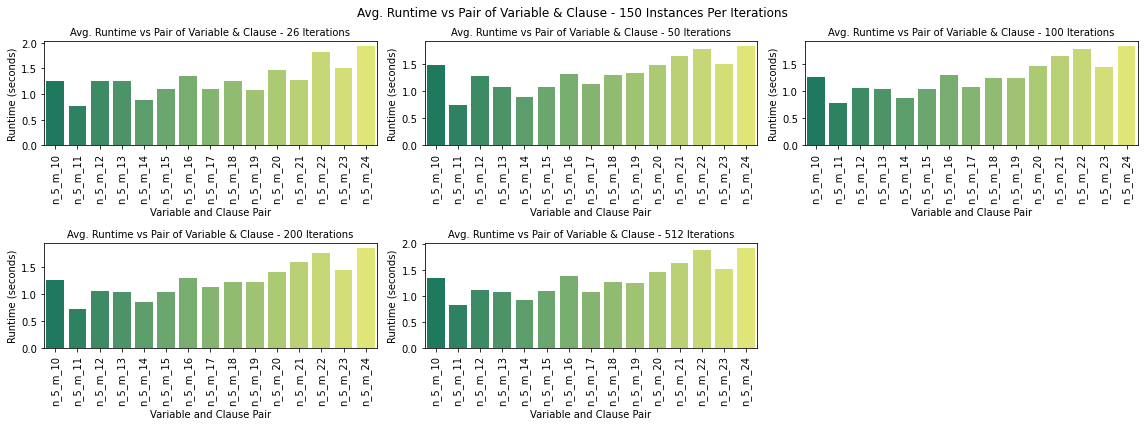

In [5]:
fig3 = plt.figure(figsize=(16, 6), constrained_layout=False)
ax4 = fig3.add_subplot(231)
ax4.set_title('Avg. Runtime vs Pair of Variable & Clause - 26 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_26, palette='summer')
ax4.set_xlabel('Variable and Clause Pair', size = 10)
ax4.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)
# ax4.set_xticks(rotation=90)

ax4 = fig3.add_subplot(232)
ax4.set_title('Avg. Runtime vs Pair of Variable & Clause - 50 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_50, palette='summer')
ax4.set_xlabel('Variable and Clause Pair', size = 10)
ax4.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

ax5 = fig3.add_subplot(233)
ax5.set_title('Avg. Runtime vs Pair of Variable & Clause - 100 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_100, palette='summer')
ax5.set_xlabel('Variable and Clause Pair', size = 10)
ax5.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

ax6 = fig3.add_subplot(234)
ax6.set_title('Avg. Runtime vs Pair of Variable & Clause - 200 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_200, palette='summer')
ax6.set_xlabel('Variable and Clause Pair', size = 10)
ax6.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

ax7 = fig3.add_subplot(235)
ax7.set_title('Avg. Runtime vs Pair of Variable & Clause - 512 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_512, palette='summer')
ax7.set_xlabel('Variable and Clause Pair', size = 10)
ax7.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

fig3.suptitle("Avg. Runtime vs Pair of Variable & Clause - 150 Instances Per Iterations", size = 12)
fig3.tight_layout()
fig3.subplots_adjust(top=0.90)
plt.show()

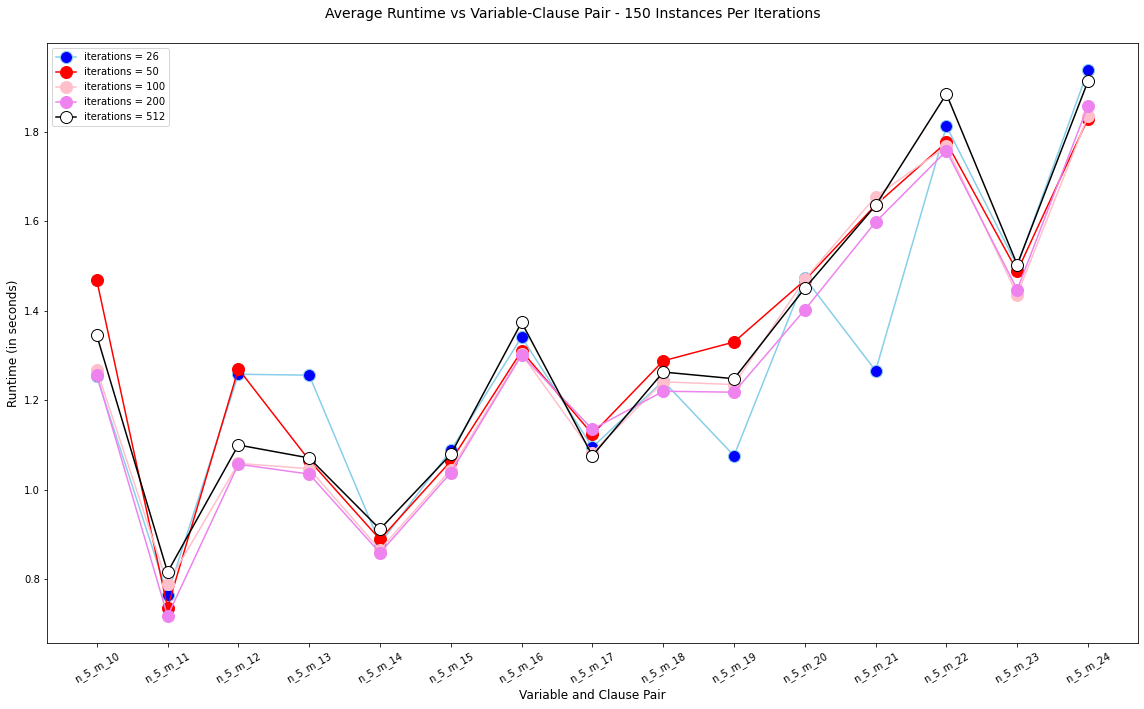

In [6]:
fig2 =  plt.figure(figsize=(16, 10), constrained_layout=False)
ax2 = fig2.add_subplot(111)
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_26, marker='o', markerfacecolor='blue', markersize=12, color='skyblue')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_50, marker='o', markerfacecolor='red', markersize=12, color='red')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_100, marker='o', markerfacecolor='pink', markersize=12, color='pink')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_200, marker='o', markerfacecolor='violet', markersize=12, color='violet')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_512, marker='o', markerfacecolor='white', markersize=12, color='black')
ax2.legend(['iterations = 26', 'iterations = 50', 'iterations = 100', 'iterations = 200', 'iterations = 512'])
# ax2.set_title("Runtime (in seconds)", size=12)
ax2.set_xlabel("Variable and Clause Pair", size = 12)
plt.xticks(rotation=30)
ax2.set_ylabel("Runtime (in seconds)", size = 12)
fig2.suptitle("Average Runtime vs Variable-Clause Pair - 150 Instances Per Iterations", size = 14)
fig2.tight_layout()
fig2.subplots_adjust(top=0.93)
plt.show()

<Figure size 1152x432 with 0 Axes>

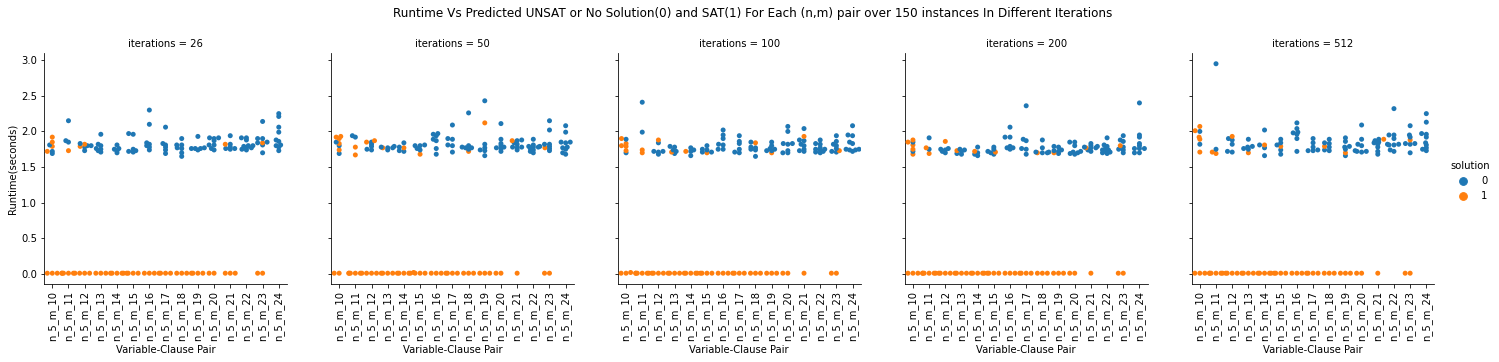

In [12]:
plt.figure(figsize=(16, 6), constrained_layout=False)
g = sns.catplot(x='dimacs', y='runtime', col = 'iterations',kind="swarm", hue = 'solution', data=all_iterations_df, height=8, aspect=.5)
plt.subplots_adjust(top=0.9, bottom=0.5)
g.set_axis_labels("Variable-Clause Pair",'Runtime(seconds)')
# g.set_xticklabels(np.array(all_iterations_df['dimacs'][0:15]))
g.set_xticklabels(rotation=90)
g.fig.suptitle('Runtime Vs Predicted UNSAT or No Solution(0) and SAT(1) For Each (n,m) pair over 150 instances In Different Iterations')
plt.show()